In [1]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier, plot_tree  
from sklearn.metrics import precision_score, recall_score, f1_score 

In [3]:
iris = load_iris() 
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names) 
iris_df['species'] = iris.target_names[iris.target] 
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [7]:
import numpy as np

In [17]:
import sklearn
import tensorflow as tf
import transformers
print("Environment setup successful!")


ModuleNotFoundError: No module named 'tensorflow'

In [19]:
import sklearn
import tensorflow as tf
import transformers
print("Environment setup successful!")

ModuleNotFoundError: No module named 'tensorflow'

In [21]:
iris_df.hist(figsize-(12, 8), bins=20)
plt.subtitle('Featur Distribution')
plt.show

NameError: name 'figsize' is not defined

AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

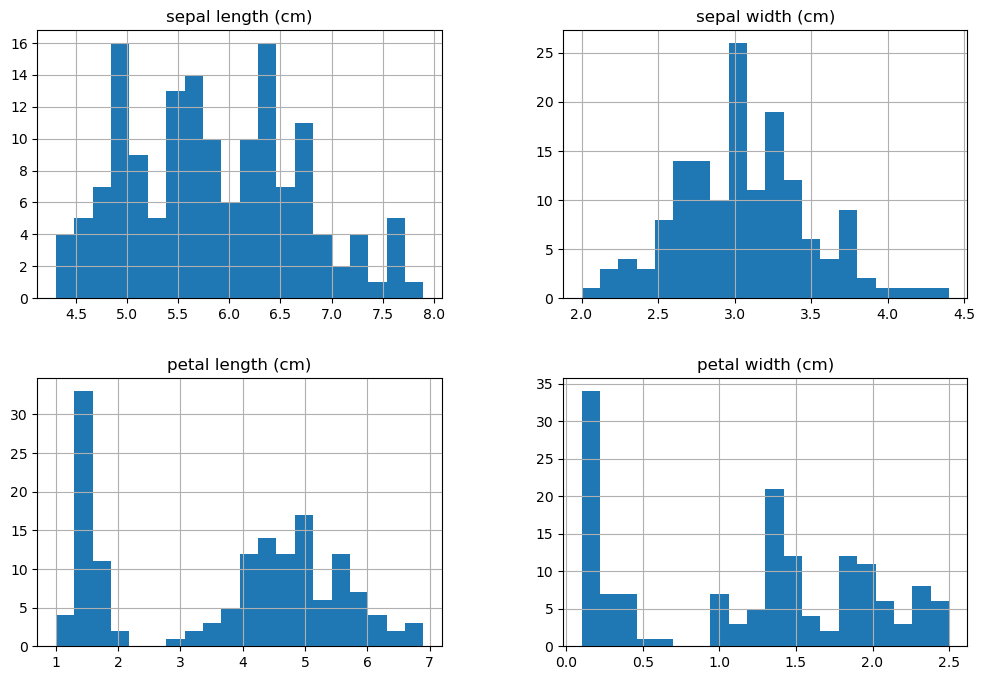

In [23]:
iris_df.hist(figsize=(12, 8), bins=20)
plt.subtitle('Featur Distribution')
plt.show

AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

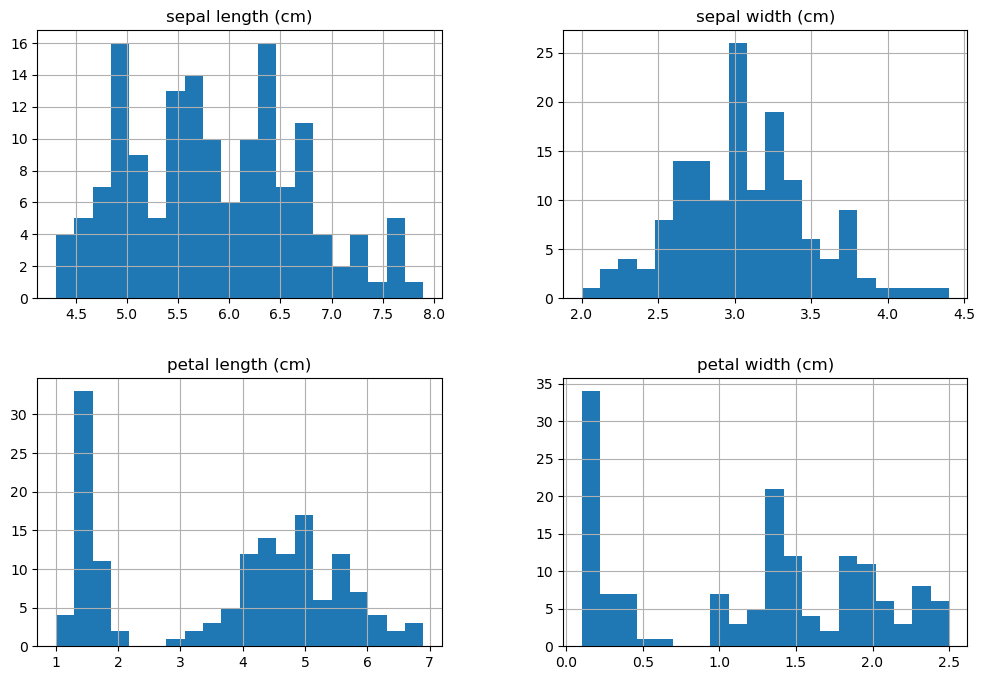

In [25]:
iris_df.hist(figsize=(12, 8), bins=20)
plt.subtitle('Feature Distribution')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'heading'

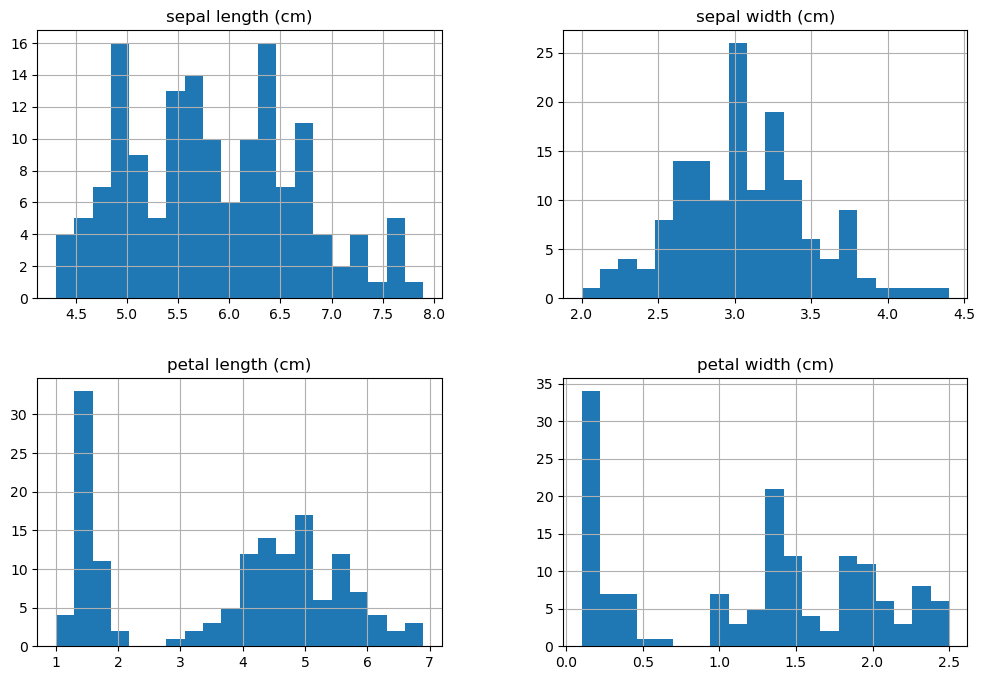

In [31]:
iris_df.hist(figsize=(12, 8), bins=20)
plt.heading('Feature Distribution')
plt.show

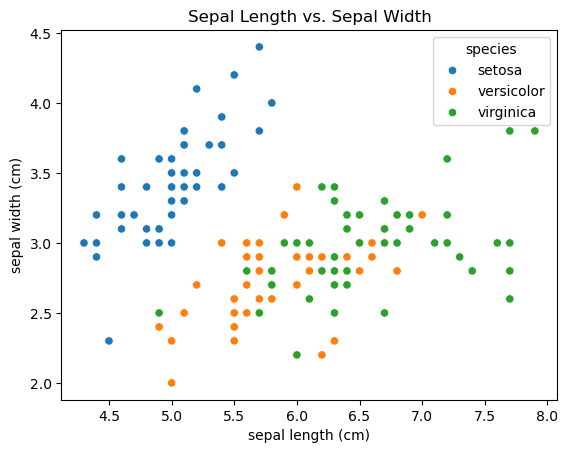

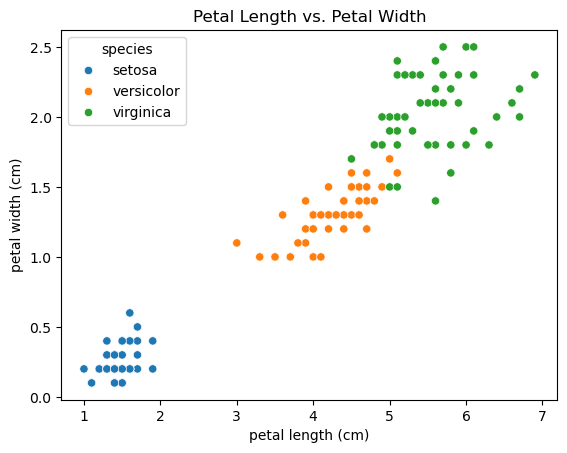

In [33]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=iris_df)
plt.title('Sepal Length vs. Sepal Width')
plt.show()

sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=iris_df)
plt.title('Petal Length vs. Petal Width')
plt.show()

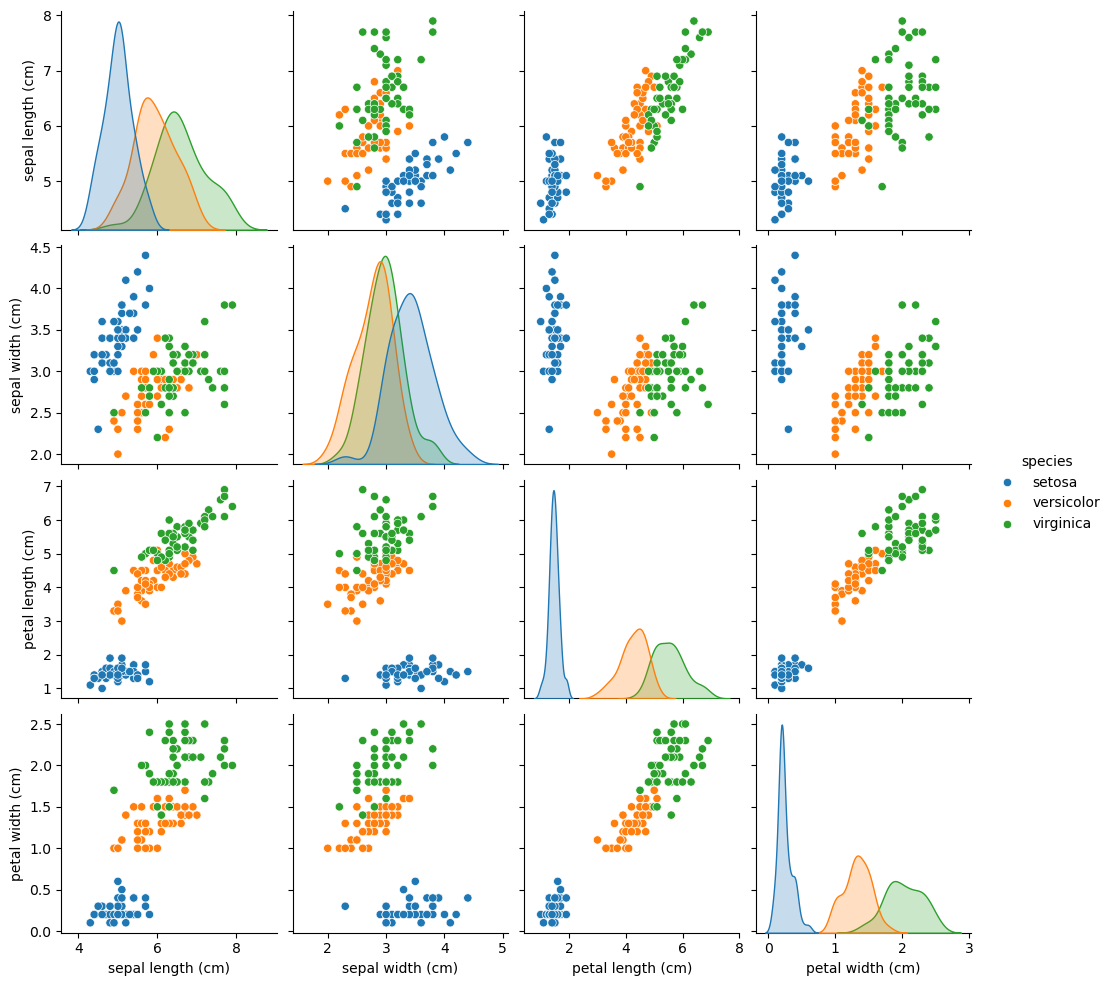

In [35]:
sns.pairplot(iris_df, hue='species') 
plt.show() 

In [37]:
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['species']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.473937,1.203658,-1.562535,-1.312603
1,-0.133071,2.992376,-1.276006,-1.045633
2,1.085898,0.085709,0.385858,0.289218
3,-1.230143,0.756479,-1.218701,-1.312603
4,-1.717731,0.309299,-1.390618,-1.312603


In [43]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
y_pred = dt_classifier.predict(X_test)
print("First few predictions:", y_pred[:5])

First few predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']


[Text(0.3076923076923077, 0.9285714285714286, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica'),
 Text(0.38461538461538464, 0.5, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = 

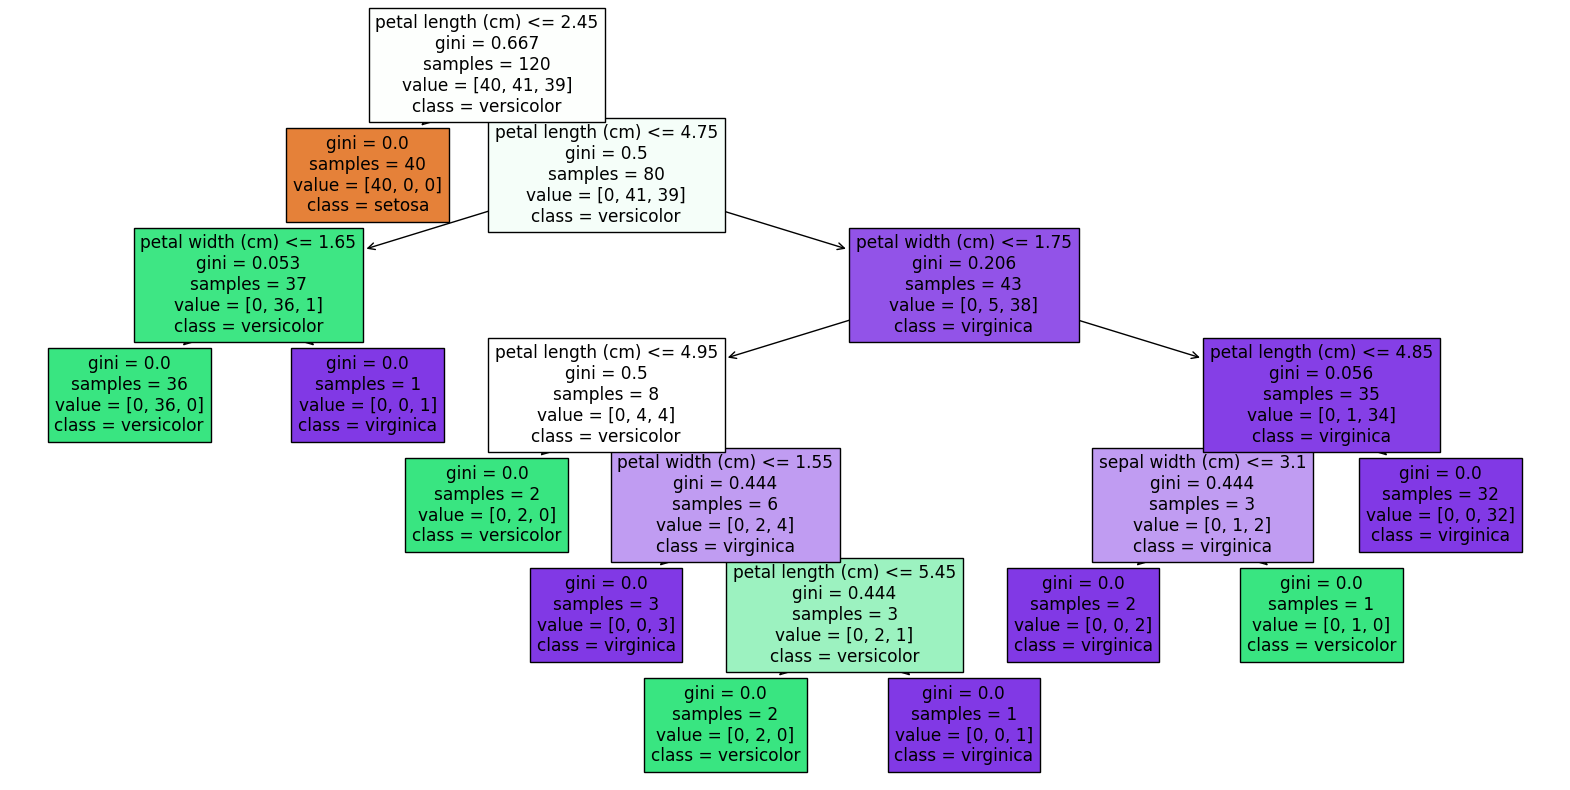

In [47]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=iris.feature_names, class_names=iris.target_names.tolist()) 

In [49]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 1.00
Recall: 1.00
F1-Score: 1.00
